In [ ]:
## import for exploratory data analysis and visualization
import os
import rasterio
import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
TRAIN_DATA_PATH = r'D:\GlacierHack_practice\train'  ## path of root folder 

In [ ]:
label_files = glob.glob(os.path.join(TRAIN_DATA_PATH, 'label', '*.tif'))  ## get all the label files
sample_label_path = label_files[0]   ## we are taking the first label file for visualization

In [ ]:
filename_parts = os.path.basename(sample_label_path).split('_')   ## splitting the filename to extract identifier which will be used to find corresponding image files
identifier = f"_{filename_parts[-2]}_{filename_parts[-1]}"

In [6]:
band_folders = ['Band1', 'Band2', 'Band3', 'Band4', 'Band5']
image_layers_list = []

In [7]:
for folder in band_folders:
    # we are using glob with a wildcard '*' to find the matching file
    search_pattern = os.path.join(TRAIN_DATA_PATH, folder, f'*{identifier}')
    found_file = glob.glob(search_pattern)[0]
    
    # Use rasterio to open the file and read the pixel data
    with rasterio.open(found_file) as src:
        image_layers_list.append(src.read(1))

In [8]:
stacked_image = np.stack(image_layers_list, axis=0)
with rasterio.open(sample_label_path) as src:
    mask = src.read(1)

In [9]:
print(f"\nFinal stacked image shape: {stacked_image.shape}")
print(f"Final mask shape: {mask.shape}")


Final stacked image shape: (5, 512, 512)
Final mask shape: (512, 512)


In [ ]:
natural_color_rgb = stacked_image[[3, 2, 1], :, :]  # Bands 4, 3, 2 correspond to R, G, B
rgb_for_plot = np.moveaxis(natural_color_rgb, 0, -1)  # Change shape from (3, H, W) to (H, W, 3) for matplotlib plotting

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..65454.0].


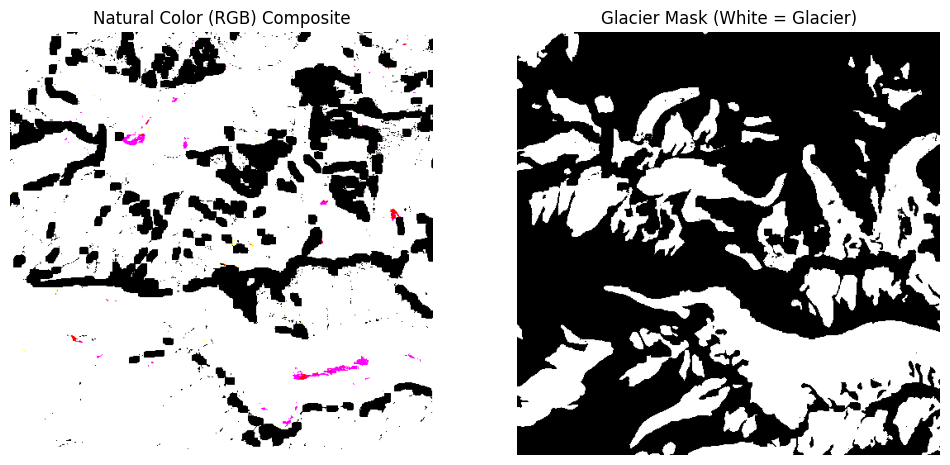

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(rgb_for_plot)
axes[0].set_title("Natural Color (RGB) Composite")
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title("Glacier Mask (White = Glacier)")
axes[1].axis('off')

plt.show()

In [ ]:
p2, p98 = np.percentile(rgb_for_plot, (2, 98)) ## here we are calculating the 2nd and 98th percentiles of the pixel values for better clarity in visualization
rgb_for_plot = np.clip((rgb_for_plot - p2) / (p98 - p2), 0, 1)

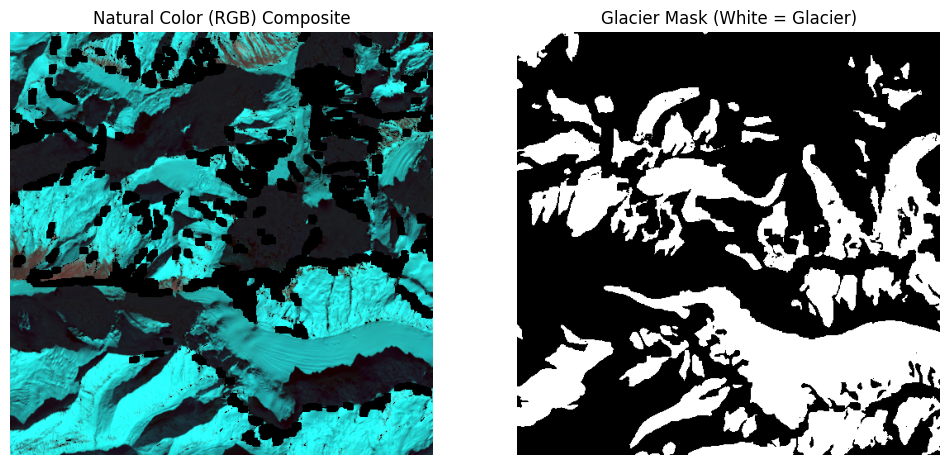

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(rgb_for_plot)
axes[0].set_title("Natural Color (RGB) Composite")
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title("Glacier Mask (White = Glacier)")
axes[1].axis('off')

plt.show()